In [1]:
'''
  author : @hunarbatra
'''

'\n  author : @hunarbatra\n'

In [0]:
# Correlation of different policies with each other 
# Countries to be considered : South Korea, US, India, Italy, Australia
# Correlation of policies with regards to each other
# Dataset used : task9oxford-new-14may.csv --> link : https://drive.google.com/open?id=1SnLZlBAbmAHWL8qhXpEhJG4P4a3Pl3vE

In [3]:
!pip install ppscore

import sys
import pandas as pd
import numpy as np
import ppscore as pps

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

import sklearn
from sklearn.linear_model import Lasso,Ridge  

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotl: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(sns.__version__))

import warnings
warnings.filterwarnings("ignore")

  Created wheel for ppscore: filename=ppscore-0.0.2-py2.py3-none-any.whl size=9629 sha256=2df0528704c82b58834463c5020eef3df2c12998be7ea5500624aa00215ea9b1
  Stored in directory: /root/.cache/pip/wheels/29/32/a2/82782fc09f5cd68e401ff047201d38af8965fb94984db18aa5
Successfully built ppscore
Python: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
Pandas: 1.0.4
Numpy: 1.18.4
Sklearn: 0.22.2.post1
Matplotl: 3.2.1
Seaborn: 0.10.1


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
link = '/content/drive/My Drive/task9oxford-new-14may.csv' # Data upto 14/05 and Mobility data upto 
df = pd.read_csv(link)
df.head()

,CountryName,Class,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,C4_Flag,C5_Close public transport,C5_Flag,C6_Stay at home requirements,C6_Flag,C7_Restrictions on internal movement,C7_Flag,C8_International travel controls,E1_Income support,E1_Flag,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,ConfirmedCases,Daily_confirmed,ConfirmedDeaths,Daily_deaths,MIR%,C1,C2,C3,C4,C5,C6,C7,H1,C8,StringencyIndex,StringencyIndexForDisplay,LegacyStringencyIndex,LegacyStringencyIndexForDisplay,population,Normalized_Confirmed_per_1000000,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,Aruba,High_Income,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,High_Income,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,High_Income,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,High_Income,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,High_Income,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,105845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14984 entries, 0 to 14983
Data columns (total 55 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CountryName                                         14984 non-null  object 
 1   Class                                               14984 non-null  object 
 2   Date                                                14984 non-null  object 
 3   C1_School closing                                   14984 non-null  float64
 4   C1_Flag                                             14984 non-null  float64
 5   C2_Workplace closing                                14984 non-null  float64
 6   C2_Flag                                             14984 non-null  float64
 7   C3_Cancel public events                             14984 non-null  float64
 8   C3_Flag                                             14984 non-null  float64


In [7]:
df = df.iloc[:,[0,2,3,5,7,9,11,13,15,17,18,20,21,22,23,25,26,27,28]]
df.fillna(0)
df.head()

,CountryName,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines
0,Aruba,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
countries = ['Australia', 'Brazil', 'Denmark', 'France', 'India', 'Japan', 'South Africa', 'South Korea', 'Sweden', 'United Kingdom', 'United States']

In [9]:
# Scale data
from sklearn.preprocessing import StandardScaler
df_s = df.copy()
cols_to_norm = [col for col in df_s.columns if col not in ['CountryName','Date']]
df_s[cols_to_norm] = StandardScaler().fit_transform(df_s[cols_to_norm])
df_s.head()

,CountryName,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,E1_Income support,E2_Debt/contract relief,E3_Fiscal measures,E4_International support,H1_Public information campaigns,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines
0,Aruba,2020-01-01,-0.92402,-0.762473,-0.938405,-0.790526,-0.607364,-0.70417,-0.765549,-1.123443,-0.512636,-0.569339,-0.028304,-0.008282,-1.346418,-0.958603,-0.873966,-0.017565,-0.019859
1,Aruba,2020-01-02,-0.92402,-0.762473,-0.938405,-0.790526,-0.607364,-0.70417,-0.765549,-1.123443,-0.512636,-0.569339,-0.028304,-0.008282,-1.346418,-0.958603,-0.873966,-0.017565,-0.019859
2,Aruba,2020-01-03,-0.92402,-0.762473,-0.938405,-0.790526,-0.607364,-0.70417,-0.765549,-1.123443,-0.512636,-0.569339,-0.028304,-0.008282,-1.346418,-0.958603,-0.873966,-0.017565,-0.019859
3,Aruba,2020-01-04,-0.92402,-0.762473,-0.938405,-0.790526,-0.607364,-0.70417,-0.765549,-1.123443,-0.512636,-0.569339,-0.028304,-0.008282,-1.346418,-0.958603,-0.873966,-0.017565,-0.019859
4,Aruba,2020-01-05,-0.92402,-0.762473,-0.938405,-0.790526,-0.607364,-0.70417,-0.765549,-1.123443,-0.512636,-0.569339,-0.028304,-0.008282,-1.346418,-0.958603,-0.873966,-0.017565,-0.019859


In [0]:
def Correlation(df,Country,drop): 

  df_c = df.loc[df['CountryName'] == Country]
  df_c.drop(drop,axis=1,inplace=True)\

  # Pearson correlation heat map 
  f,ax = plt.subplots(figsize=(15,10))
  ax = sns.heatmap(df_c.corr(),cmap='plasma',linewidth=0.5,annot=True,annot_kws={"size":12},fmt=".2f",ax=ax)
  ax.axes.set_title(Country+" : Pearson Correlation",fontsize=15)
  ax.tick_params(labelsize=12);

  '''
  # Power predictive score heat map
  f,ax = plt.subplots(figsize=(15,10))
  df_matrix = pps.matrix(df_c,sample=None)
  ax =sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="YlGnBu",linewidth=0.5,annot=True,annot_kws={"size":12},fmt=".2f",ax=ax)
  ax.axes.set_title(Country+" : Power Predictive Score",fontsize=15)
  ax.tick_params(labelsize=12);
  '''

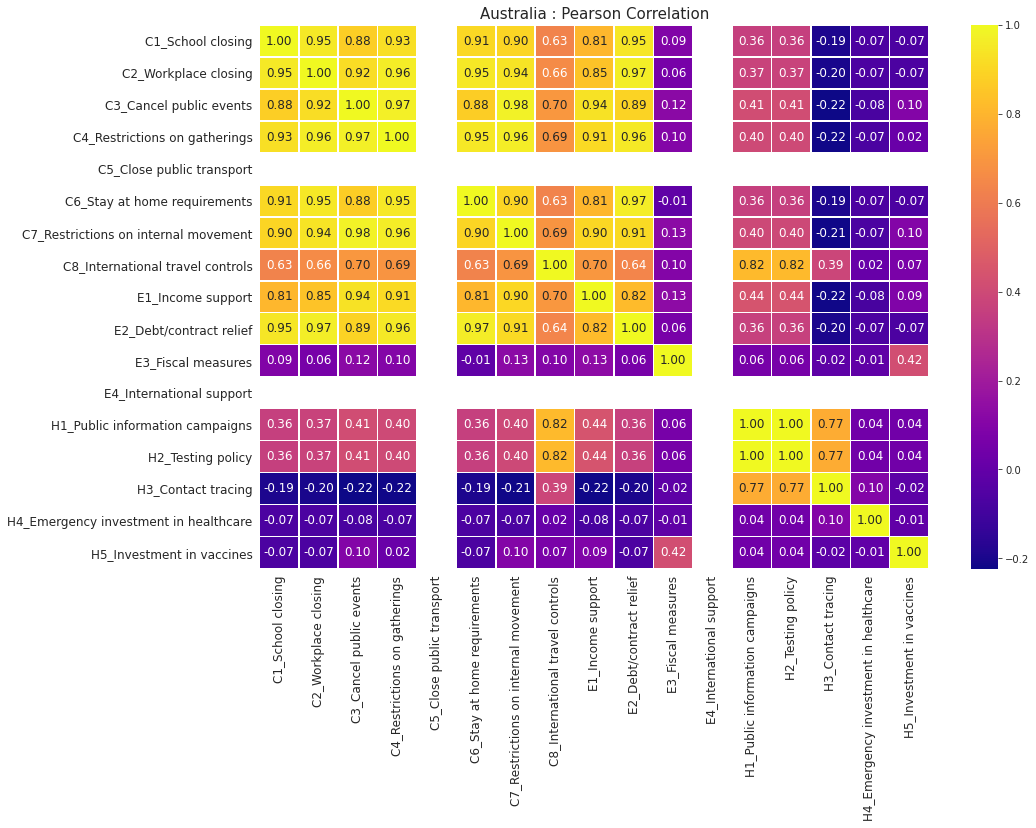

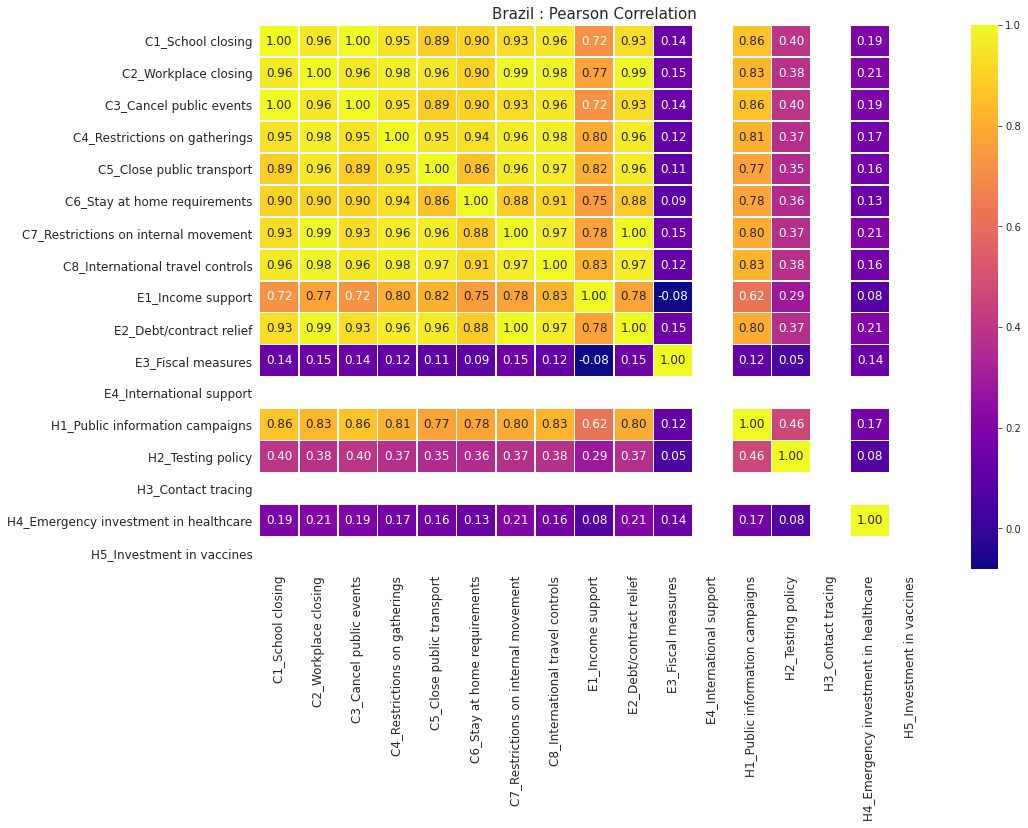

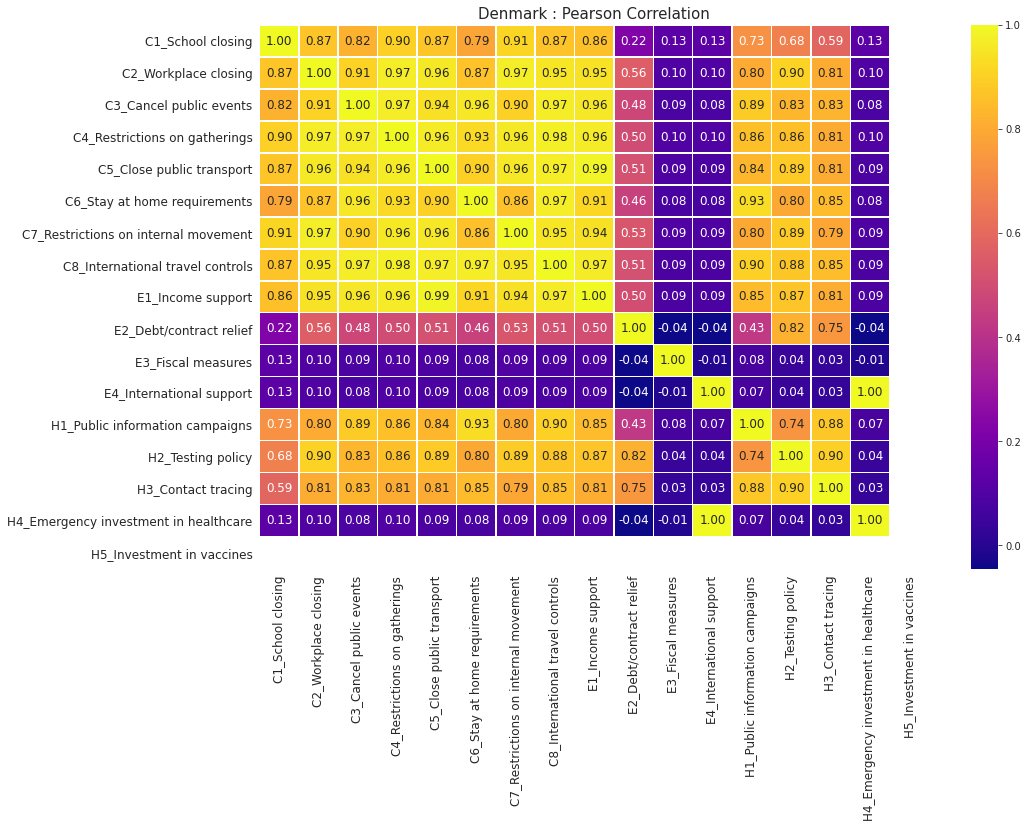

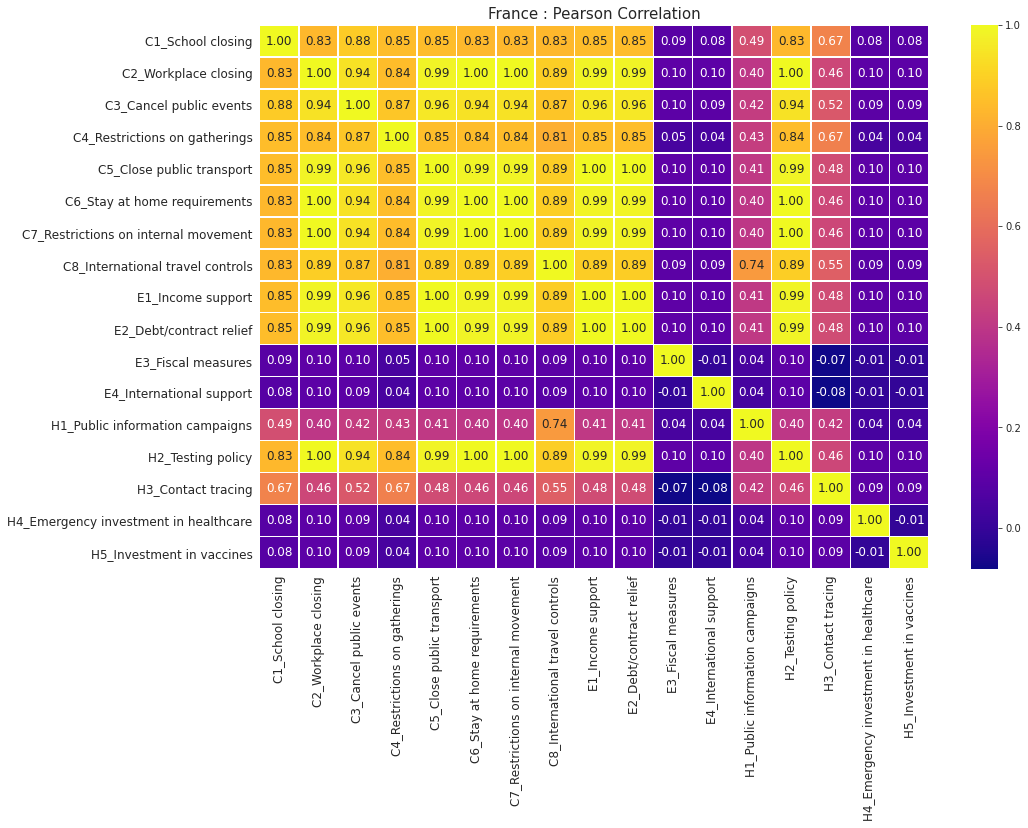

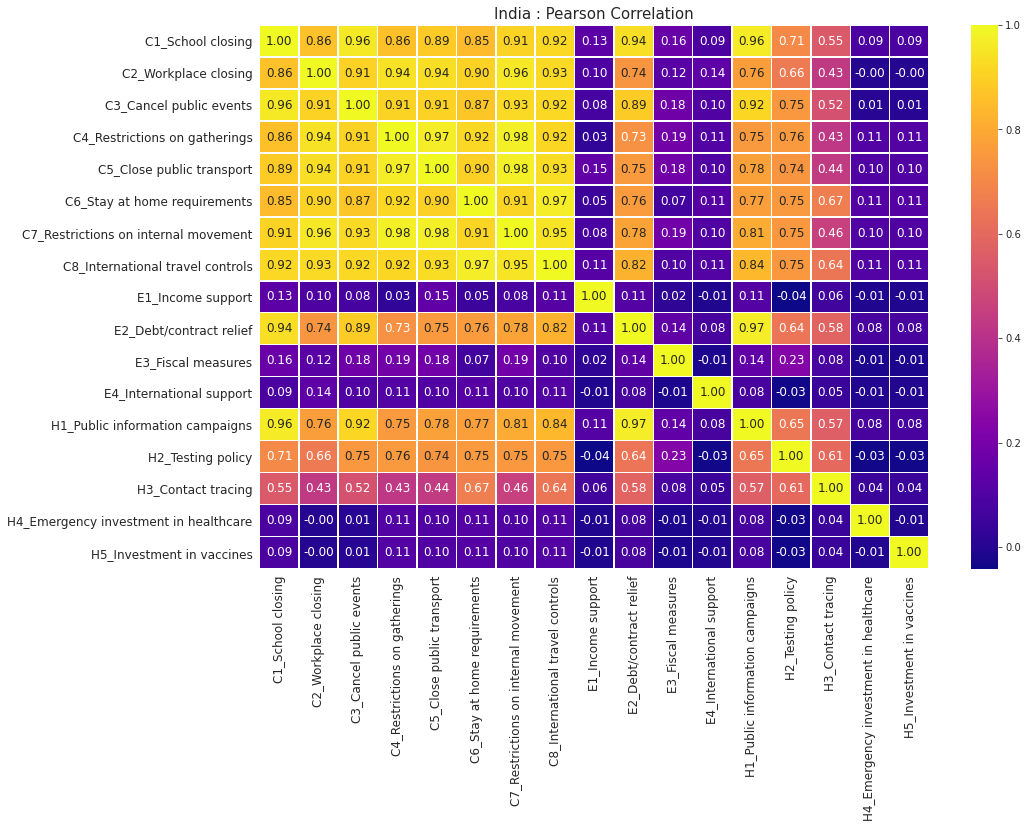

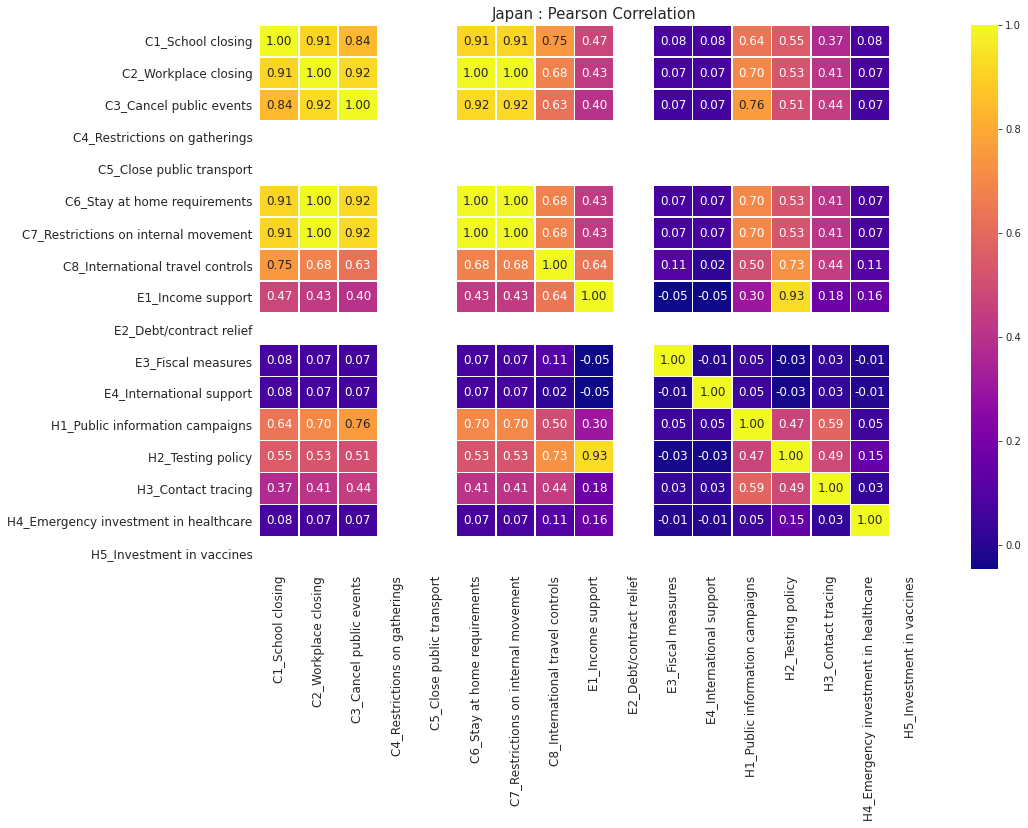

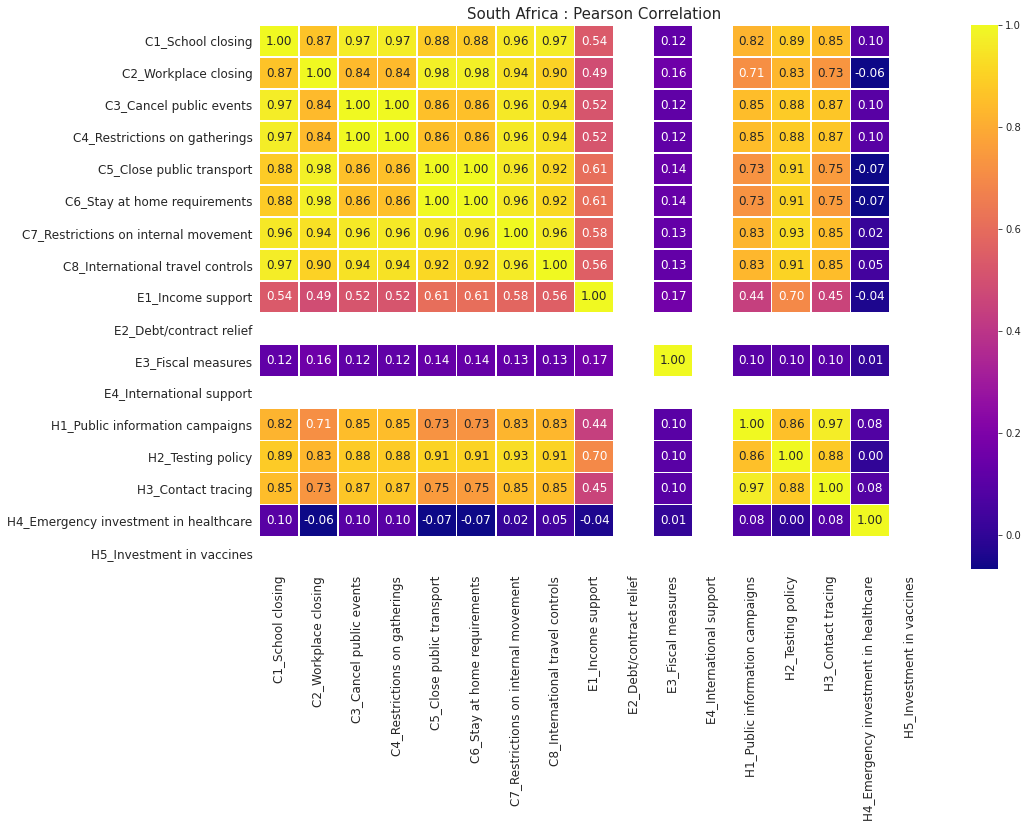

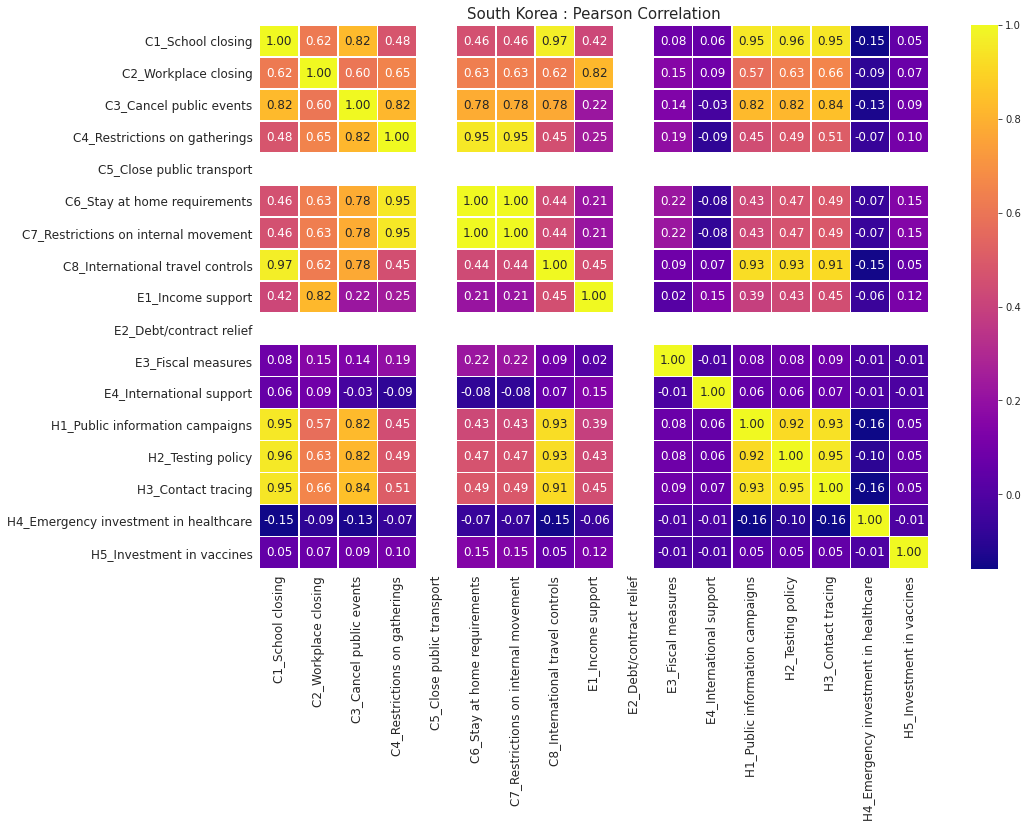

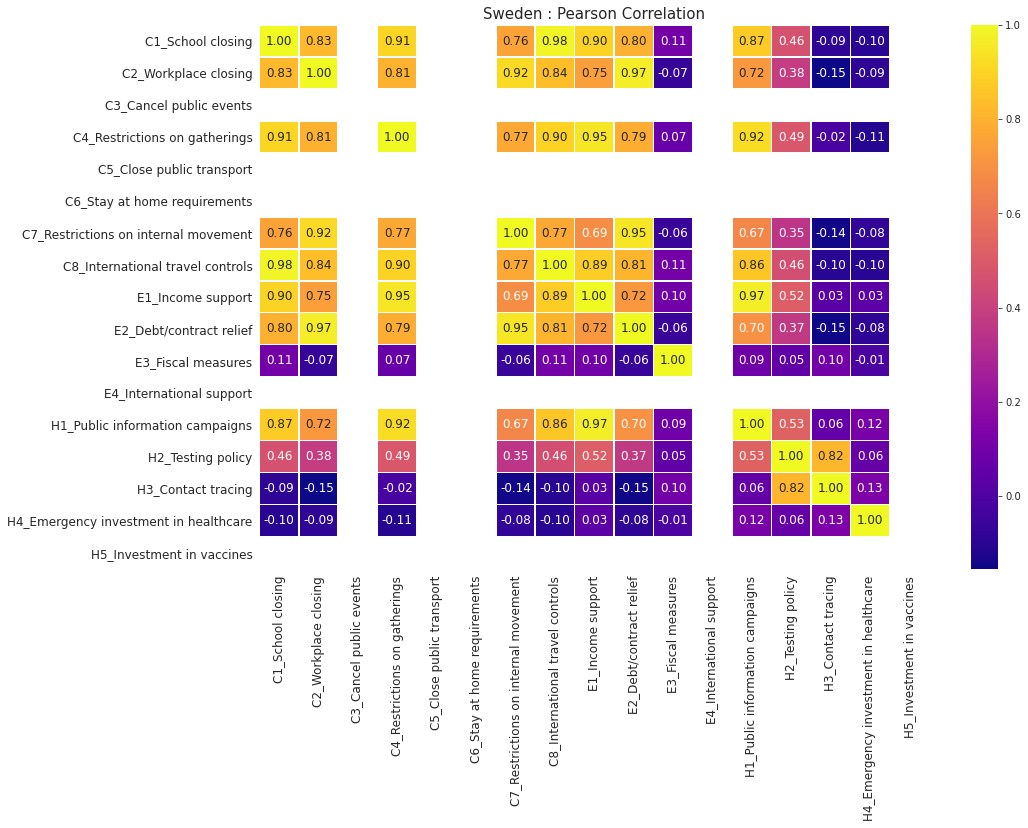

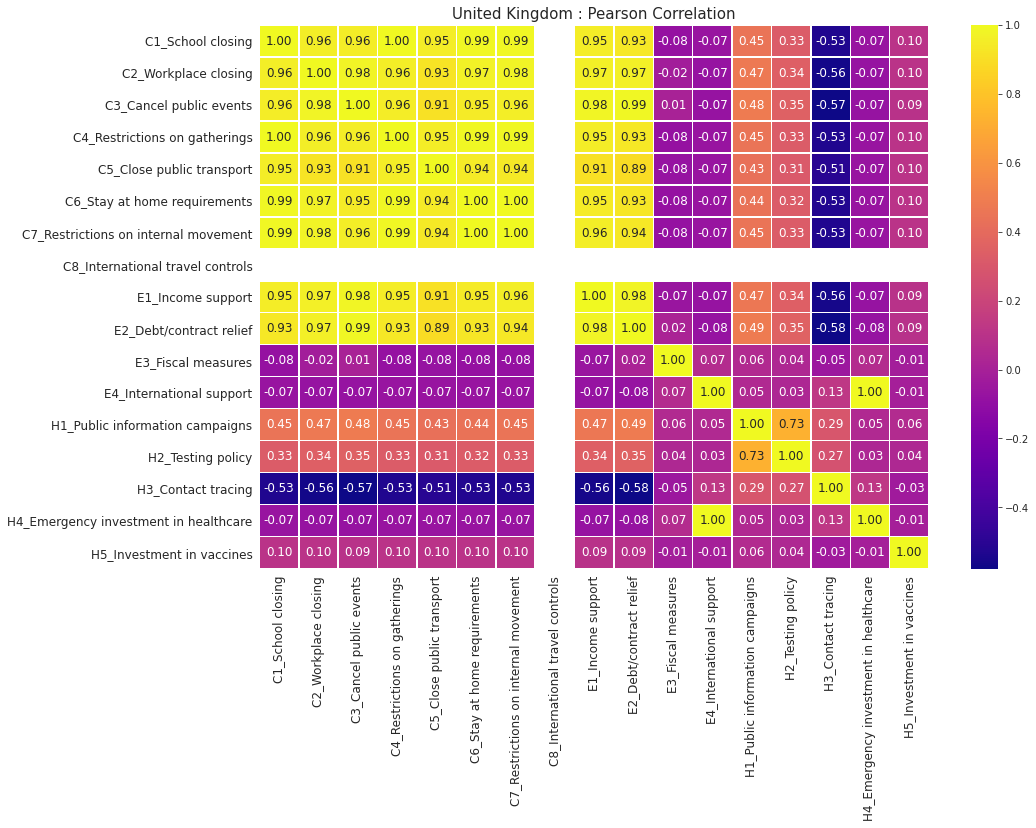

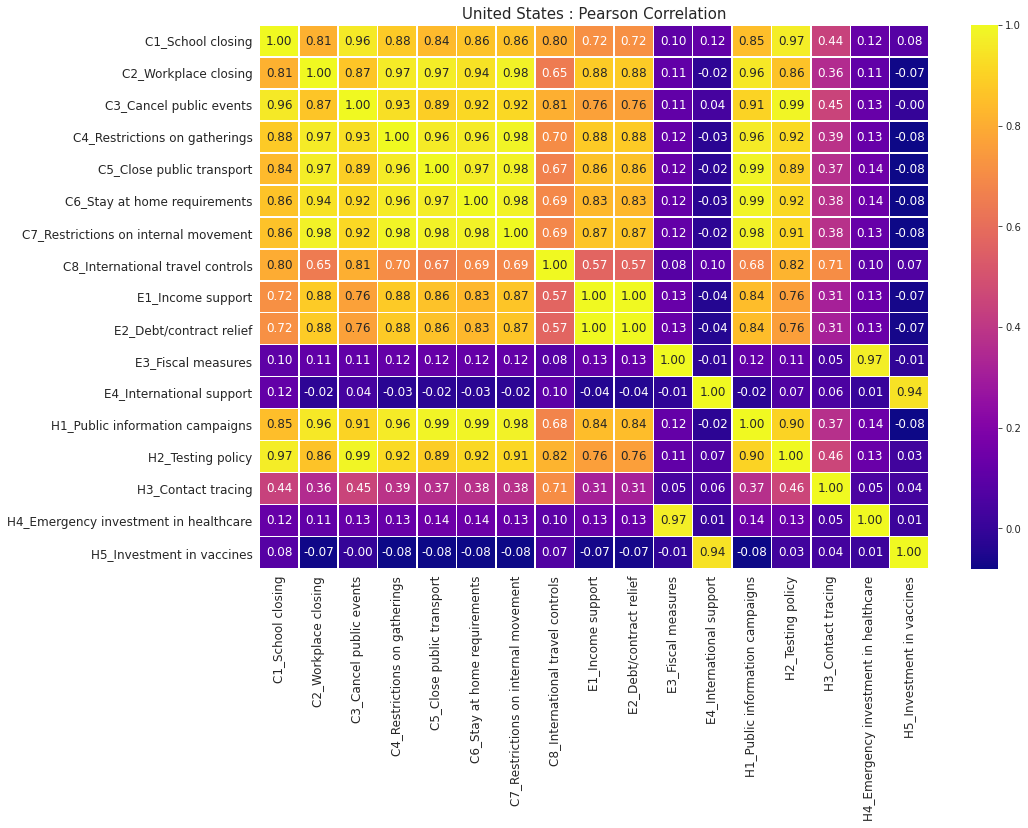

In [11]:
# Correlation(df,'India',['CountryName','Date'])
for i in countries : 
  Correlation(df,i,['CountryName','Date'])